# Comparison of two optics to plot beta beating

In [1]:
import imageio
import pickle
import pandas as pd
import numpy as np
import PyNAFF as pnf
import scipy.io as sio 
import matplotlib.cm as cm
from math import log10, floor
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from scipy.optimize import curve_fit

### Figure parameters

In [17]:
plt.rcParams['figure.figsize'] = [5.0, 4.5]
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 14

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 10

plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 2

### Function Declarations

In [3]:
def harmonic_fn(x, a, b, c, d):
    return a + b*np.cos(c + 2*np.pi*d*x)

def quadratic(x, a, m, c):
    return a*x**2 + x*m + c

def quadratic(x, a, m, c):
    return a*x**2 + x*m + c

def Md_fit(x, a, b, c, d):
        return a + b*np.cos(c*x+d)
    
def Md_ramp_fit(x, a, b, c, d):
    return a + b*(x-1)*np.cos(c*(x-1)+d)

def round_sig(x, sig=4):
    return round(x, sig-int(floor(log10(abs(x))))-1)

In [4]:
def add_input_file(dd, filename, label):
	f = filename
	p = dict()
	sio.loadmat(f, mdict=p)
	dd[label] = p	
	print '\tAdded output data from ', filename, '\t dictionary key: ', label
	return dd

In [9]:
def Read_PTC_Twiss_Return_Dict(filename, verbose=True):
    # Dictionary for output
    d = dict()
    keywords = ''
    
    # First we open and count header lines
    fin0=open(filename,'r').readlines()
    headerlines = 0
    for l in fin0:
        headerlines = headerlines + 1
        if '* NAME' in l:
            keywords = l
            break
    headerlines = headerlines + 1
    
    if verbose: print '\nRead_PTC_Twiss_Return_Dict found Keywords: \n',keywords
    dict_keys = []
    for key in keywords.split():
        dict_keys.append(key)
    dict_keys.remove('*')
    if verbose: print '\nRead_PTC_Twiss_Return_Dict Dict Keys: \n',dict_keys
    
    for key in dict_keys:
        d[key]=[]
        
    if verbose: print '\nRead_PTC_Twiss_Return_Dict empty dictionary \n', d
    
    # Strip header
    fin1=open(filename,'r').readlines()[headerlines:]   
    
    for l in fin1:
        i = -1        
        for value in l.split():
            i = i+1
            if 'NAME' in dict_keys[i]:
                d[dict_keys[i]].append(str(value))
            else:
                d[dict_keys[i]].append(float(value))    
                
    return dict_keys, d

# Import Data

In [55]:
keys_00, d_00 = Read_PTC_Twiss_Return_Dict('00/optimised_flat_file.tfs')
keys_05, d_05 = Read_PTC_Twiss_Return_Dict('05/optimised_flat_file.tfs')
keys_10, d_10 = Read_PTC_Twiss_Return_Dict('10/optimised_flat_file.tfs')


Read_PTC_Twiss_Return_Dict found Keywords: 
* NAME                                S               BETX               BETY               ALFX               ALFY              DISP1              DISP2              DISP3              DISP4                  X                 PX                  Y                 PY 


Read_PTC_Twiss_Return_Dict Dict Keys: 
['NAME', 'S', 'BETX', 'BETY', 'ALFX', 'ALFY', 'DISP1', 'DISP2', 'DISP3', 'DISP4', 'X', 'PX', 'Y', 'PY']

Read_PTC_Twiss_Return_Dict empty dictionary 
{'PY': [], 'NAME': [], 'BETY': [], 'BETX': [], 'DISP4': [], 'Y': [], 'S': [], 'PX': [], 'DISP1': [], 'X': [], 'DISP3': [], 'DISP2': [], 'ALFY': [], 'ALFX': []}

Read_PTC_Twiss_Return_Dict found Keywords: 
* NAME                                S               BETX               BETY               ALFX               ALFY              DISP1              DISP3                MUX                MUY                  X                 PX                  Y                 PY 


Read_PTC_Twiss_Retu

In [11]:
keys_00

['NAME',
 'S',
 'BETX',
 'BETY',
 'ALFX',
 'ALFY',
 'DISP1',
 'DISP2',
 'DISP3',
 'DISP4',
 'X',
 'PX',
 'Y',
 'PY']

In [12]:
d_00['S']

[0.0,
 0.797,
 0.797,
 0.797,
 0.797,
 2.9945925,
 2.9945925,
 5.200185,
 5.200185,
 5.200185,
 5.200185,
 8.200185,
 8.200185,
 8.200185,
 8.200185,
 10.4057775,
 10.4057775,
 12.60337,
 12.60337,
 12.60337,
 12.60337,
 14.01237,
 14.13237,
 14.20337,
 14.20337,
 14.20337,
 14.20337,
 16.4009625,
 16.4009625,
 18.606555,
 18.606555,
 18.606555,
 18.606555,
 19.409555,
 19.409555,
 20.008555,
 20.128555,
 20.206555,
 20.206555,
 20.206555,
 20.206555,
 22.4121475,
 22.4121475,
 24.60974,
 24.60974,
 24.60974,
 24.60974,
 26.20974,
 26.20974,
 26.20974,
 26.20974,
 28.4073325,
 28.4073325,
 30.612925,
 30.612925,
 30.612925,
 30.612925,
 32.212925,
 32.212925,
 32.212925,
 32.212925,
 34.4185175,
 34.4185175,
 36.61611,
 36.61611,
 36.61611,
 36.61611,
 36.61611,
 36.61611,
 39.41511,
 39.53511,
 39.61611,
 39.61611,
 39.61611,
 39.61611,
 41.8137025,
 41.8137025,
 44.019295,
 44.019295,
 44.019295,
 44.019295,
 45.431295,
 45.551295,
 45.619295,
 45.619295,
 45.619295,
 45.619295,
 47.

### Plot Parameters

In [26]:
save_folder = 'Plots/'

sc = 'SbS'
legend_label = 'Beta-Beating' # r'$\frac{\delta p}{p_0}$'
main_label = 'PS_LIU_2021'
main_label2 = main_label + '_zoom'
scaled_label = main_label + '_scaled'
betagamma = 3.13154090774 * 0.947643035549 # 2GeV
#betagamma = 2.492104532 * 0.9159915293879255 # 1.4GeV

# Plots

#### Horizontal Betas

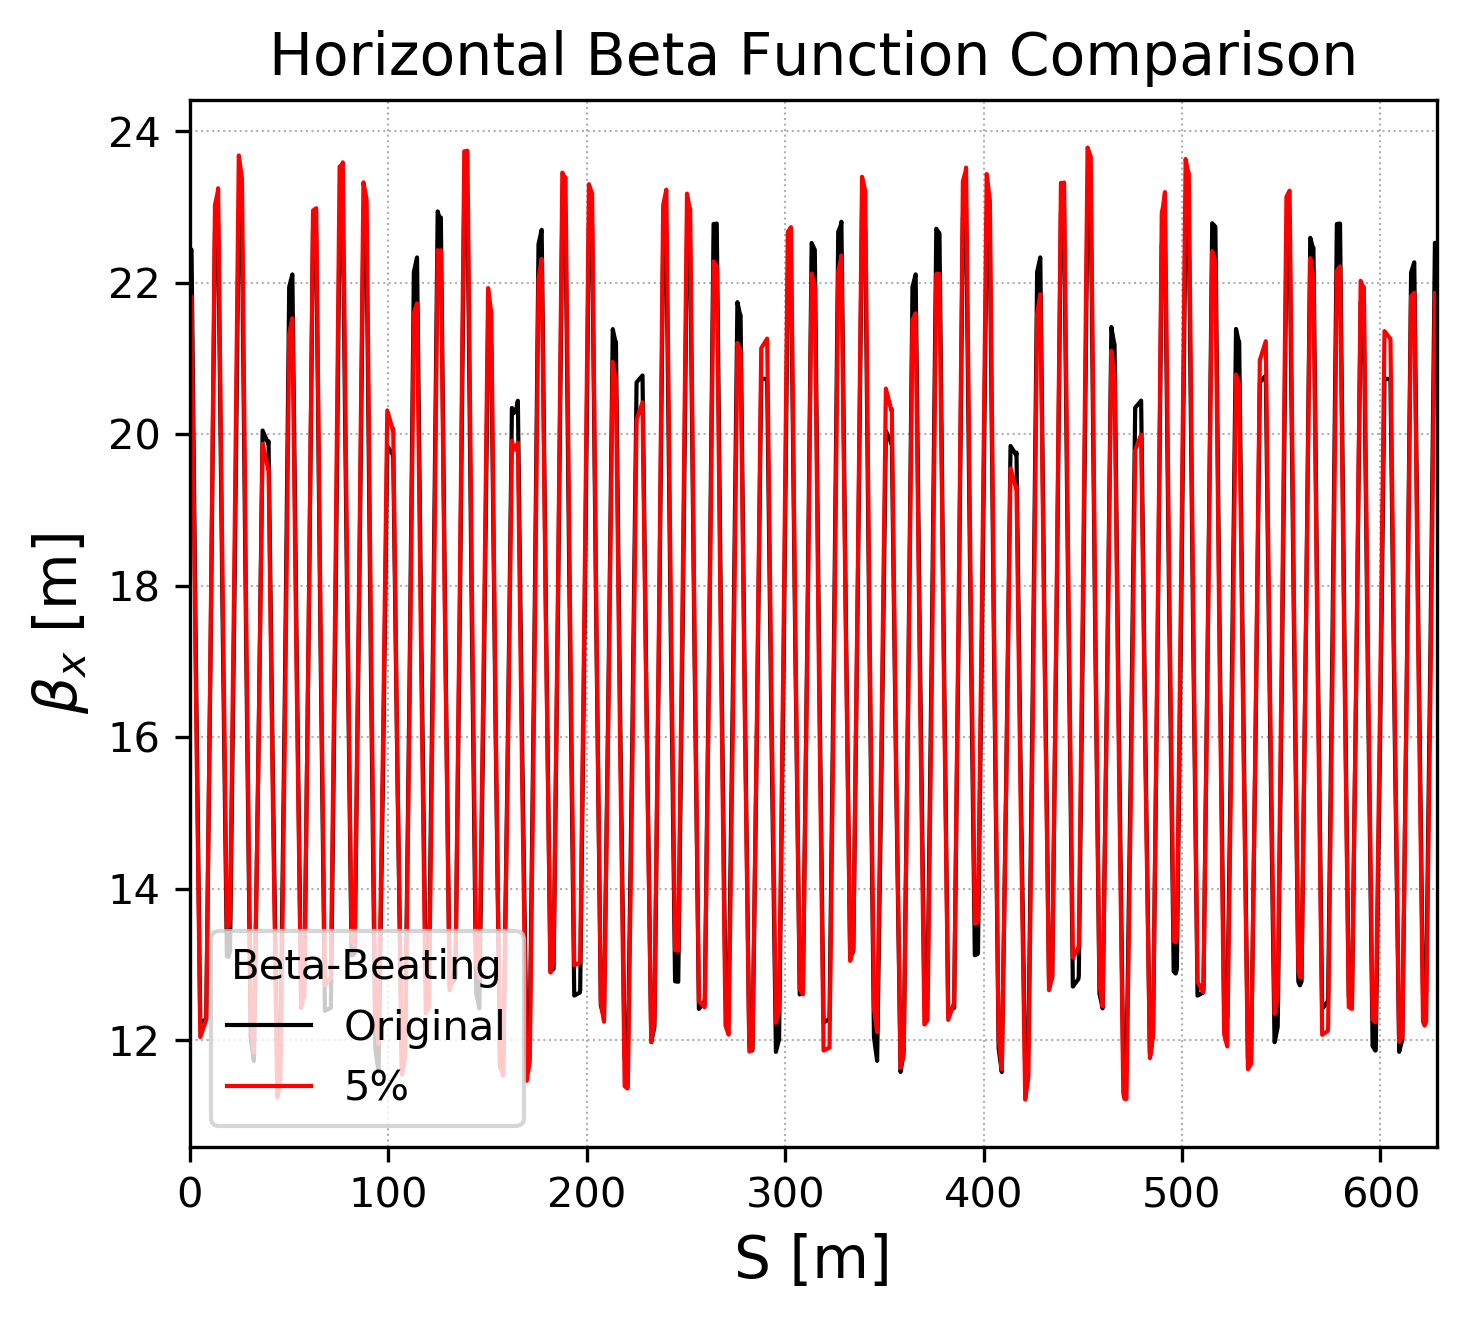

In [57]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

ax1.plot(d_00['S'], d_00['BETX'], label='Original', color='k');
ax1.plot(d_05['S'], d_05['BETX'], label='5%', color='r');

ax1.set_title('Horizontal Beta Function Comparison');

ax1.set_ylabel(r'$\beta_x$ [m]');
ax1.set_xlabel('S [m]');

ax1.legend(loc=3, title=legend_label)
ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(0,np.max(d_05['S']))

fig1.tight_layout()

savename = save_folder + '/'+ main_label + '_beta_x.png'
plt.savefig(savename, dpi = 800);

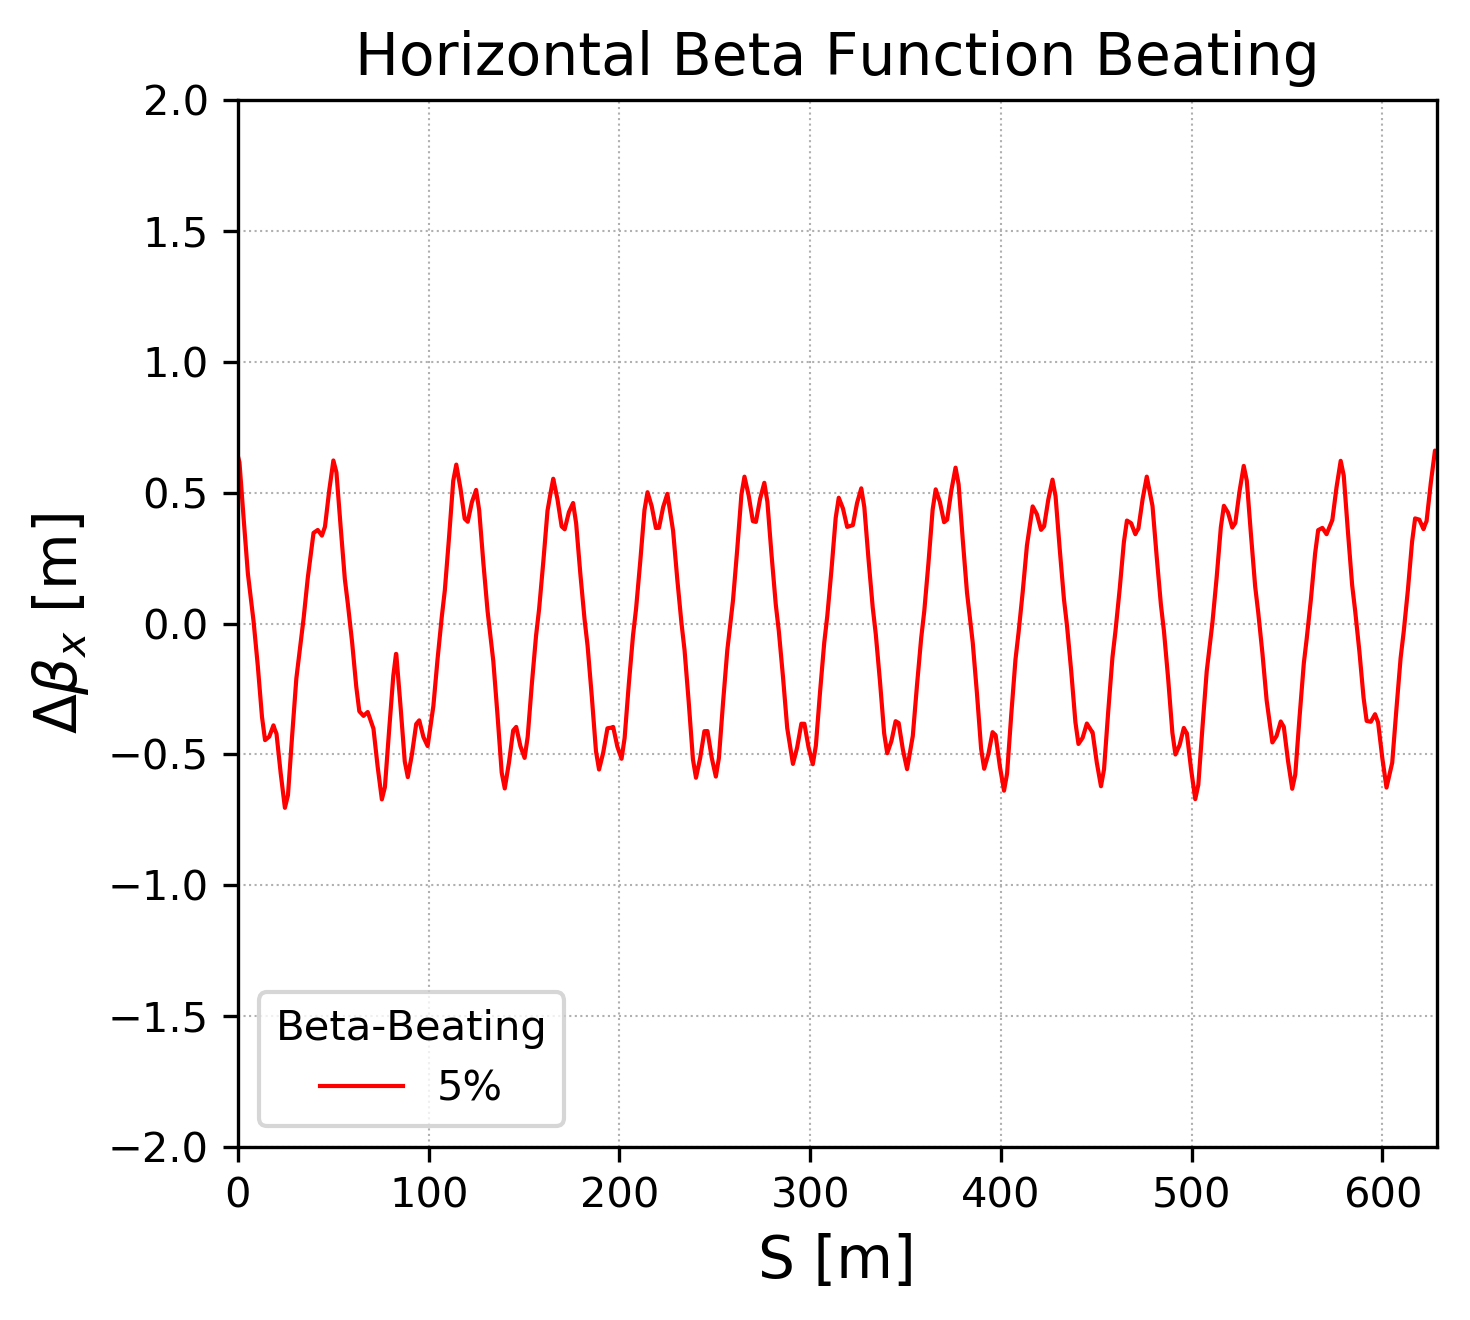

In [58]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

x = np.array(d_00['S'])

y = []
for i in xrange(len(d_00['BETX'])):
    y.append(d_00['BETX'][i] - d_05['BETX'][i])

ax1.plot(x, y, label='5%', color='r');

ax1.set_title('Horizontal Beta Function Beating');

ax1.set_ylabel(r'$\Delta \beta_x$ [m]');
ax1.set_xlabel('S [m]');

ax1.legend(loc=3, title=legend_label)
ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(0,np.max(d_05['S']))
ax1.set_ylim(-2,2)

fig1.tight_layout()

savename = save_folder + '/'+ main_label + '_beta_x_beating_m.png'
plt.savefig(savename, dpi = 800);

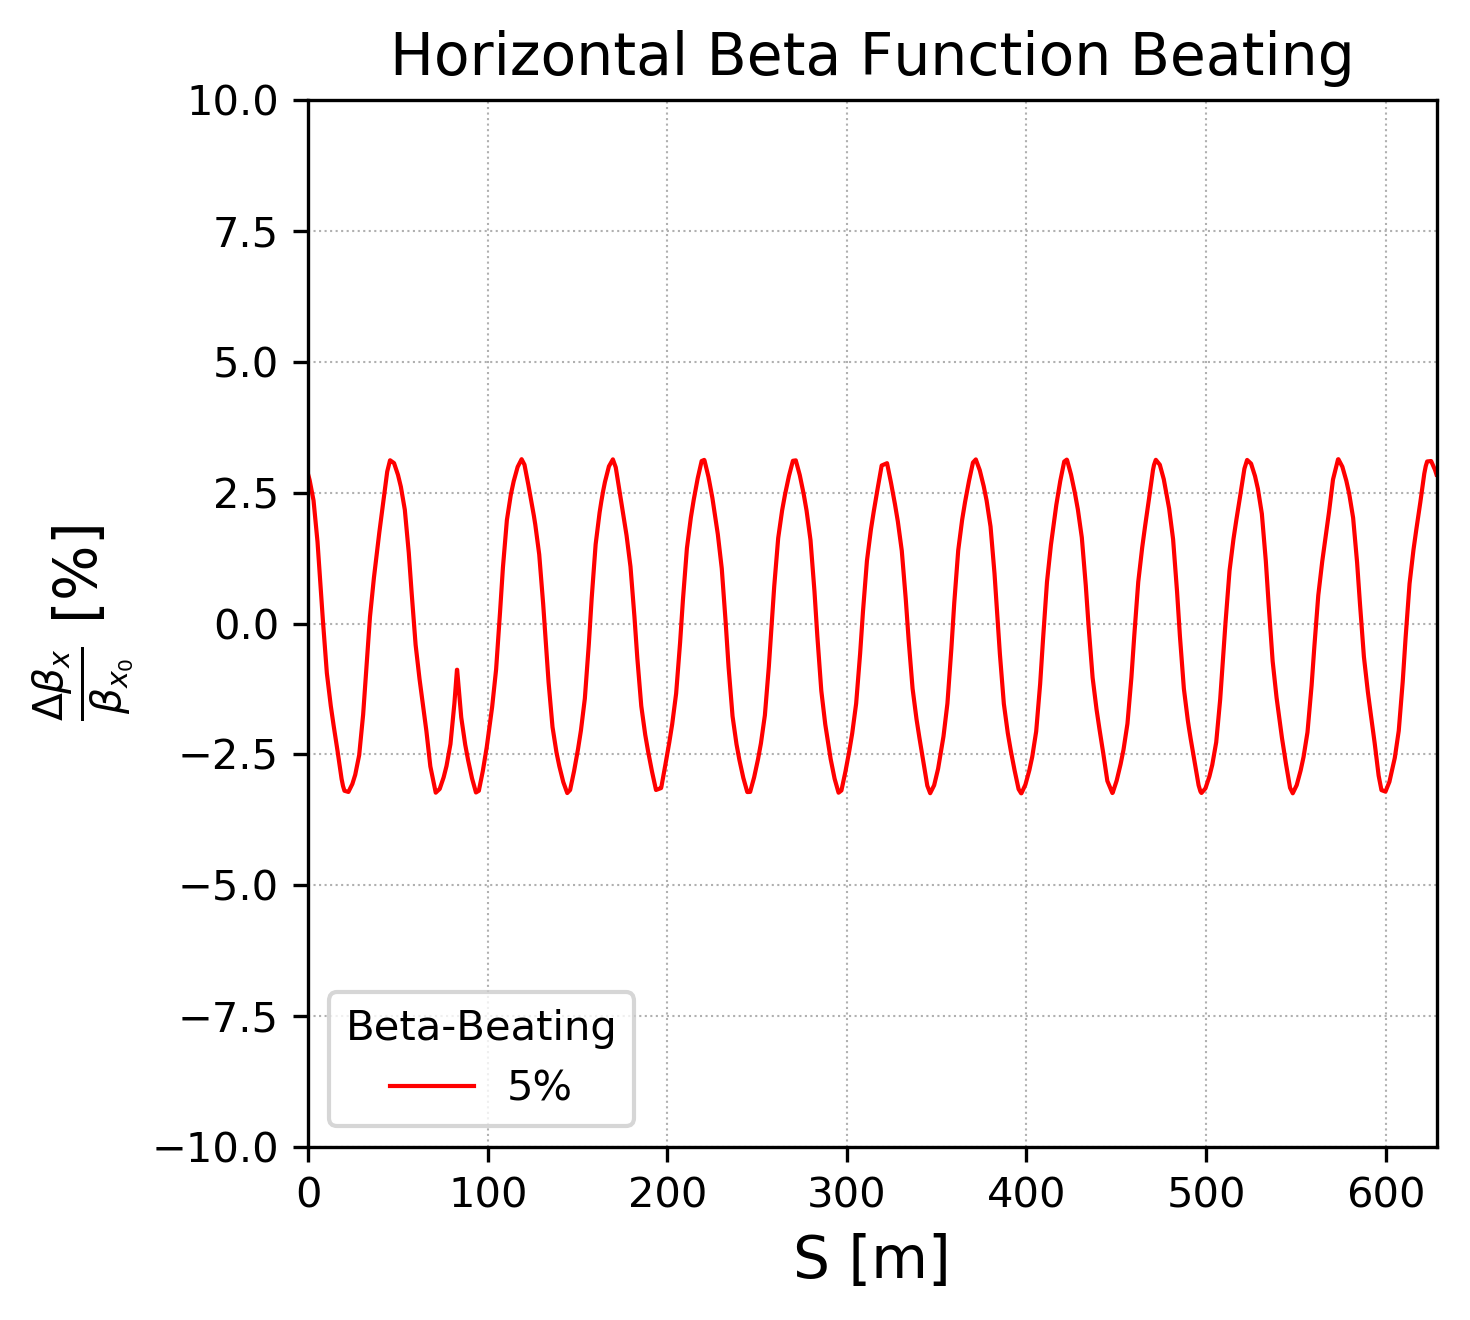

In [59]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

x = np.array(d_00['S'])

y = []
for i in xrange(len(d_00['BETX'])):
    y.append( ((d_00['BETX'][i] - d_05['BETX'][i])/d_00['BETX'][i])*100 )

ax1.plot(x, y, label='5%', color='r');
#ax1.plot(d_05['S'], d_05['BETX'], label='5%', color='r');

ax1.set_title('Horizontal Beta Function Beating');

ax1.set_ylabel(r'$\frac{\Delta \beta_x}{\beta_{x_0}}$ [%]');
ax1.set_xlabel('S [m]');

ax1.legend(loc=3, title=legend_label)
ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(0,np.max(d_05['S']))
ax1.set_ylim(-10,10)

fig1.tight_layout()

savename = save_folder + '/'+ main_label + '_beta_x_beating_rel.png'
plt.savefig(savename, dpi = 800);

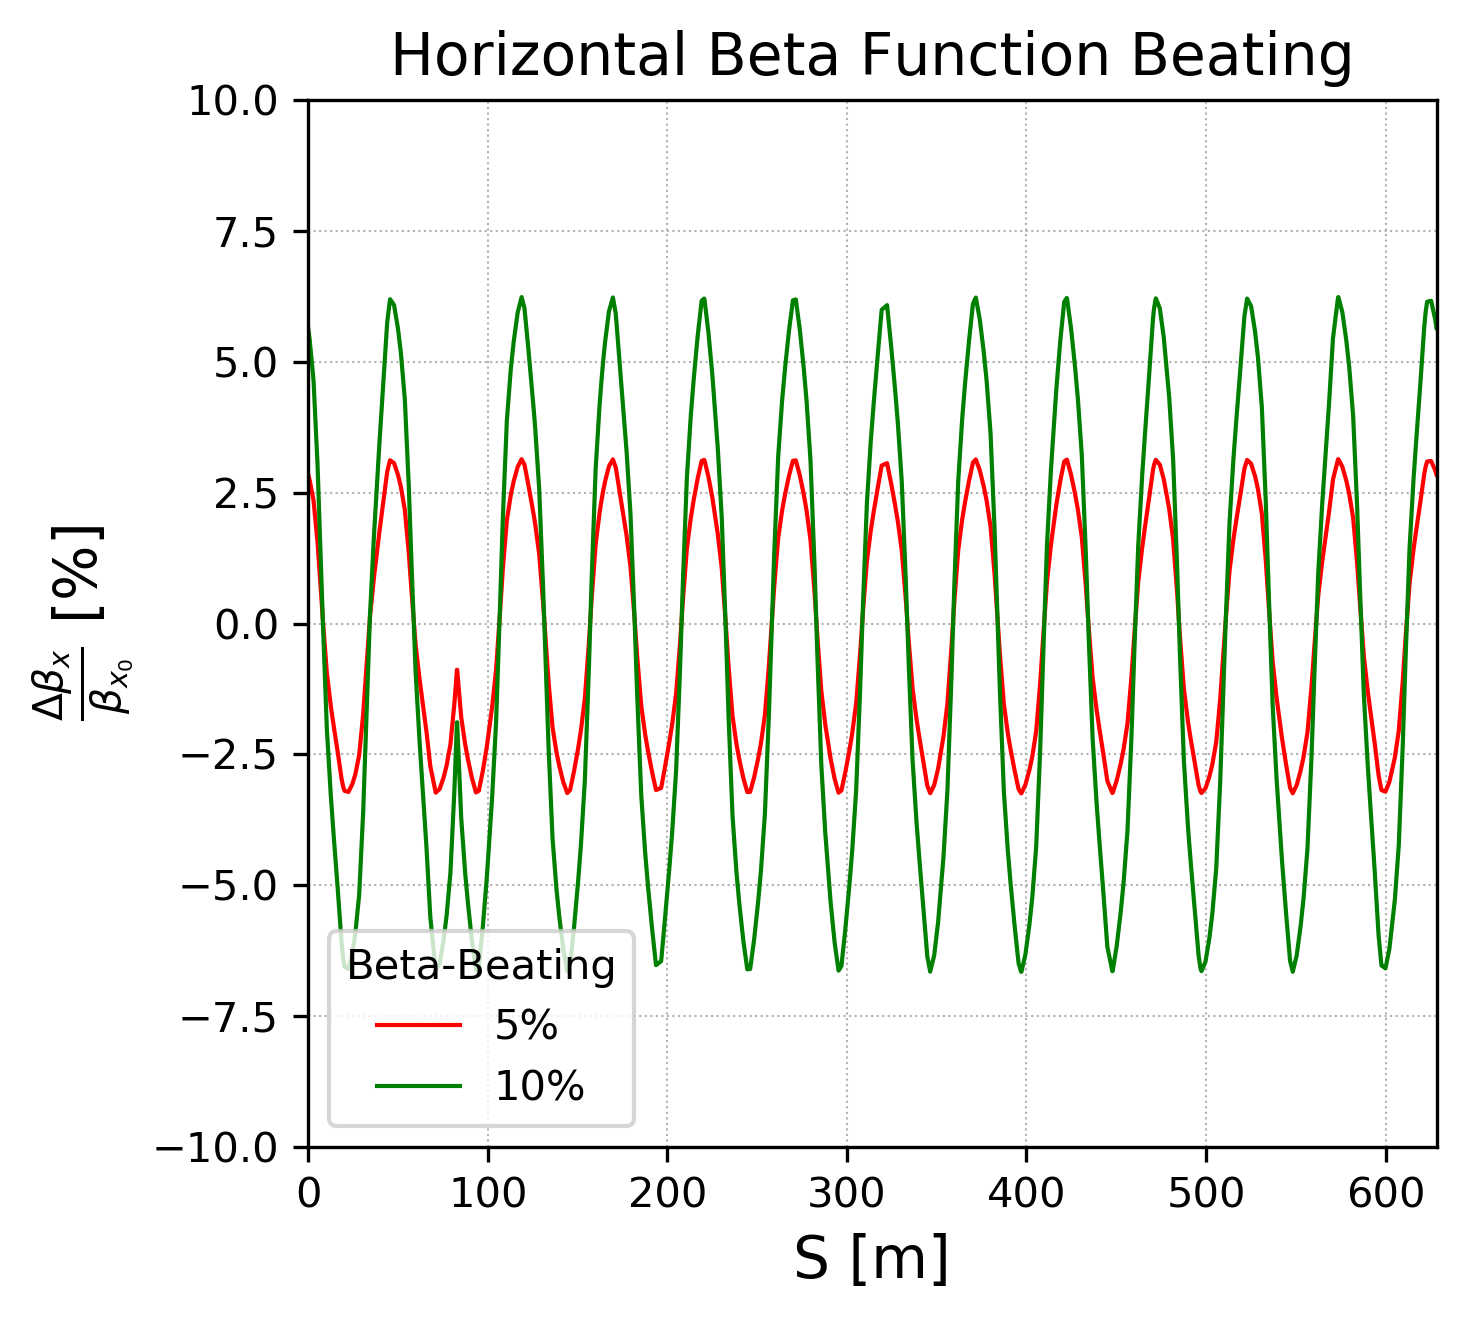

In [60]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

x = np.array(d_00['S'])

y = []
for i in xrange(len(d_00['BETX'])):
    y.append( ((d_00['BETX'][i] - d_05['BETX'][i])/d_00['BETX'][i])*100 )    
    
z = []
for i in xrange(len(d_00['BETX'])):
    z.append( ((d_00['BETX'][i] - d_10['BETX'][i])/d_00['BETX'][i])*100 )

ax1.plot(x, y, label='5%', color='r');
ax1.plot(x, z, label='10%', color='g');
#ax1.plot(d_05['S'], d_05['BETX'], label='5%', color='r');

ax1.set_title('Horizontal Beta Function Beating');

ax1.set_ylabel(r'$\frac{\Delta \beta_x}{\beta_{x_0}}$ [%]');
ax1.set_xlabel('S [m]');

ax1.legend(loc=3, title=legend_label)
ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(0,np.max(d_05['S']))
ax1.set_ylim(-10,10)

fig1.tight_layout()

savename = save_folder + '/'+ main_label + '_beta_x_beating_rel_all.png'
plt.savefig(savename, dpi = 800);

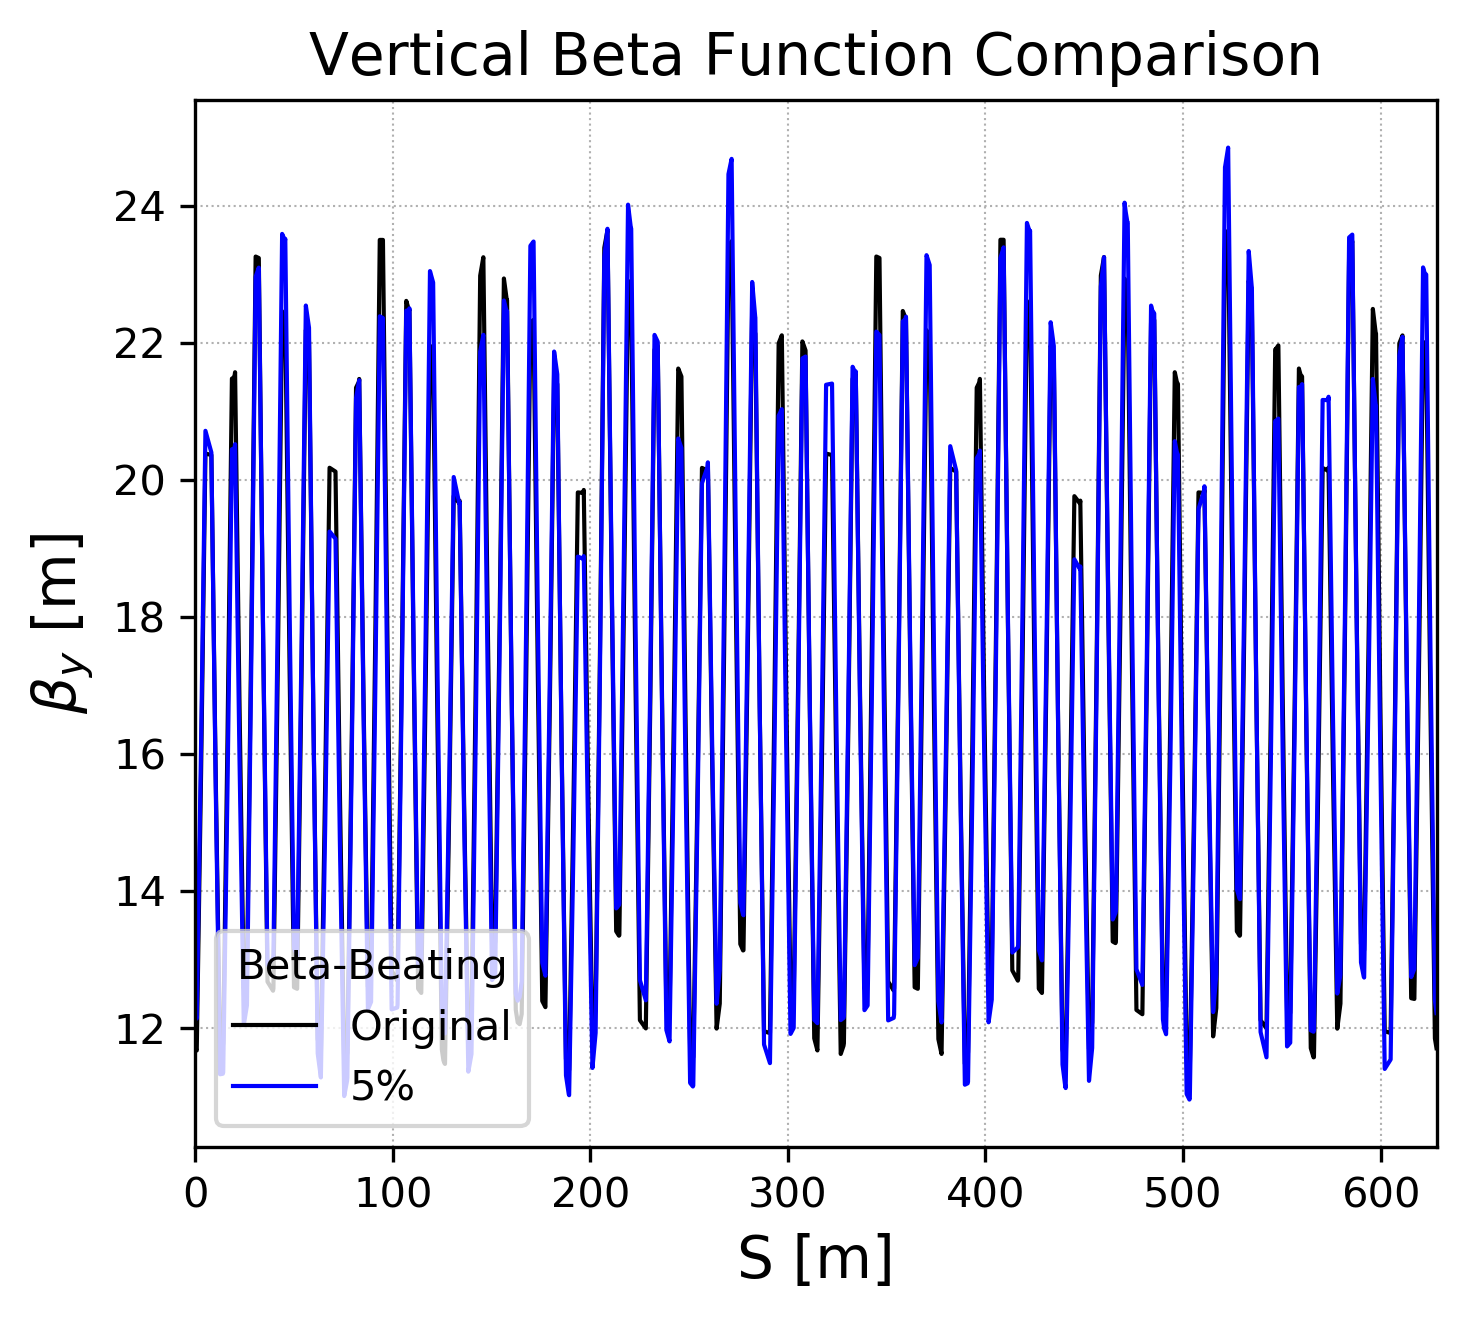

In [48]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

ax1.plot(d_00['S'], d_00['BETY'], label='Original', color='k');
ax1.plot(d_05['S'], d_05['BETY'], label='5%', color='b');

ax1.set_title('Vertical Beta Function Comparison');

ax1.set_ylabel(r'$\beta_y$ [m]');
ax1.set_xlabel('S [m]');

ax1.legend(loc=3, title=legend_label)
ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(0,np.max(d_05['S']))

fig1.tight_layout()

savename = save_folder + '/'+ main_label + '_beta_y.png'
plt.savefig(savename, dpi = 800);

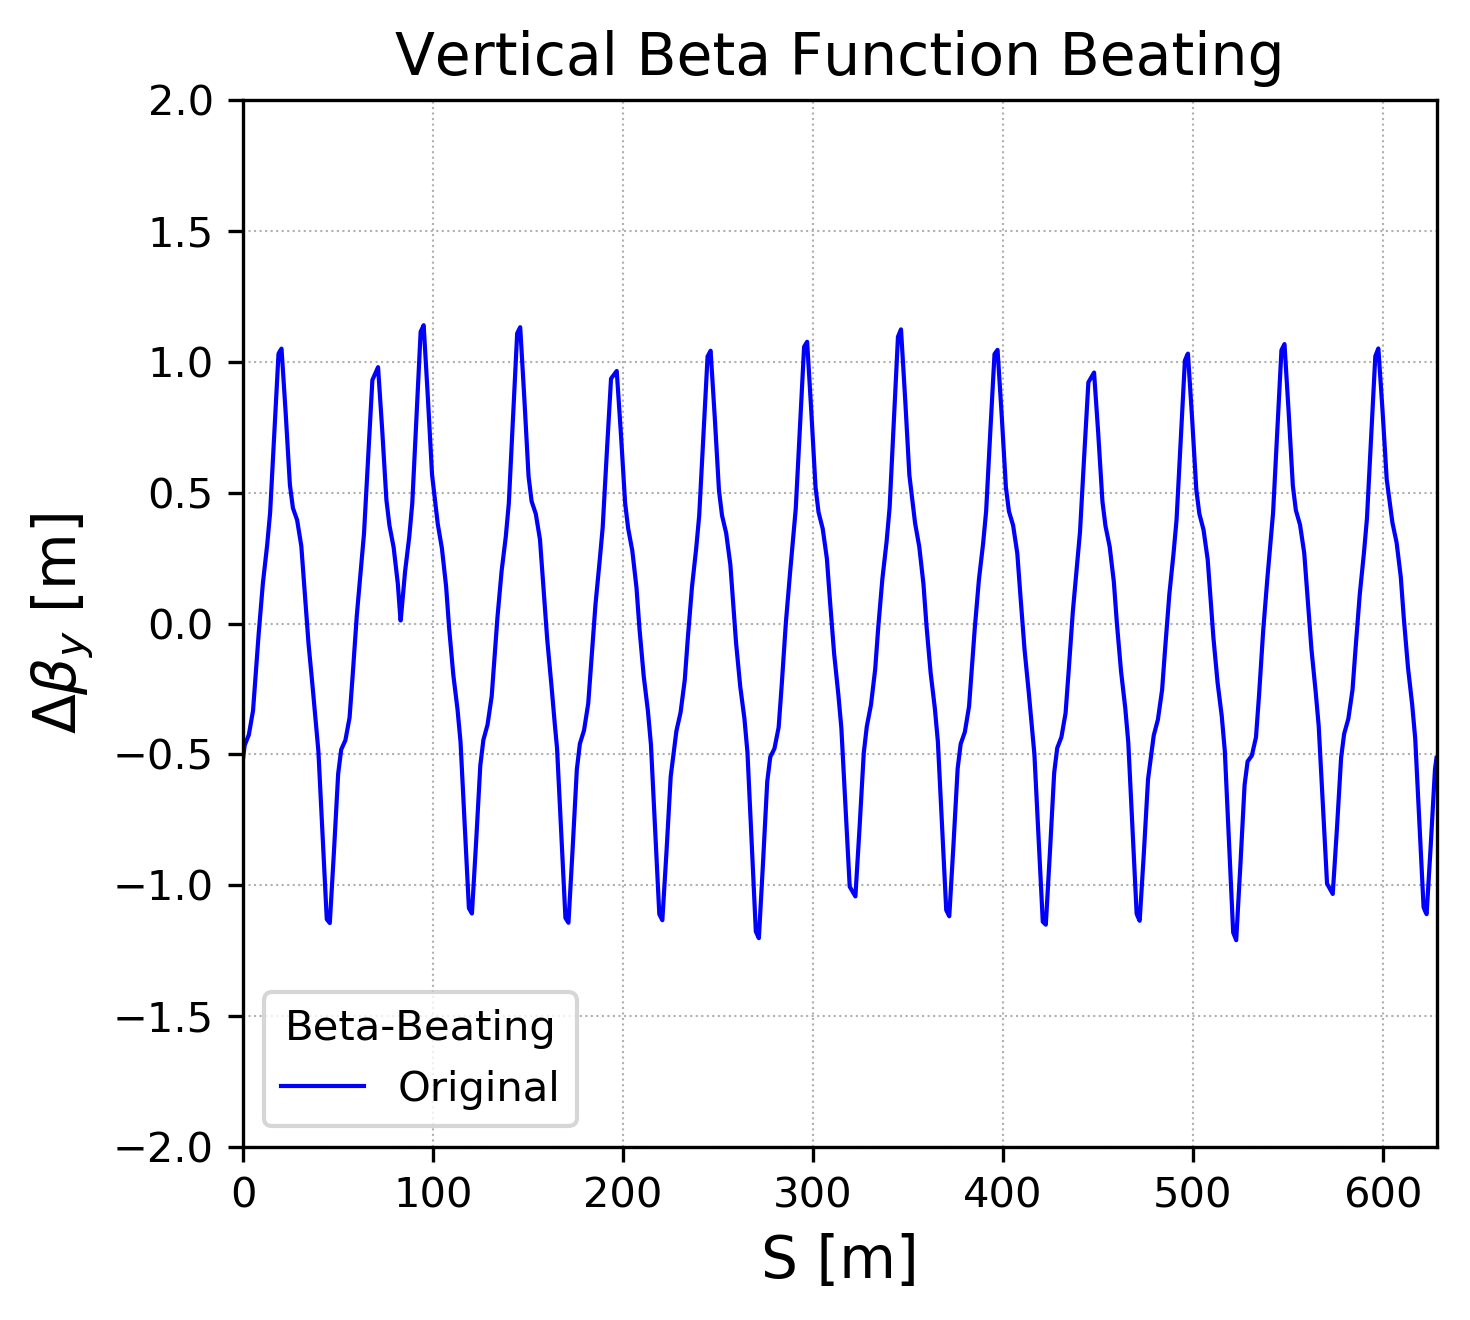

In [54]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

x = np.array(d_00['S'])

y = []
for i in xrange(len(d_00['BETY'])):
    y.append(d_00['BETY'][i] - d_05['BETY'][i])

ax1.plot(x, y, label='5%', color='b');

ax1.set_title('Vertical Beta Function Beating');

ax1.set_ylabel(r'$\Delta \beta_y$ [m]');
ax1.set_xlabel('S [m]');

ax1.legend(loc=3, title=legend_label)
ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(0,np.max(d_05['S']))
ax1.set_ylim(-2,2)

fig1.tight_layout()

savename = save_folder + '/'+ main_label + '_beta_y_beating_m.png'
plt.savefig(savename, dpi = 800);

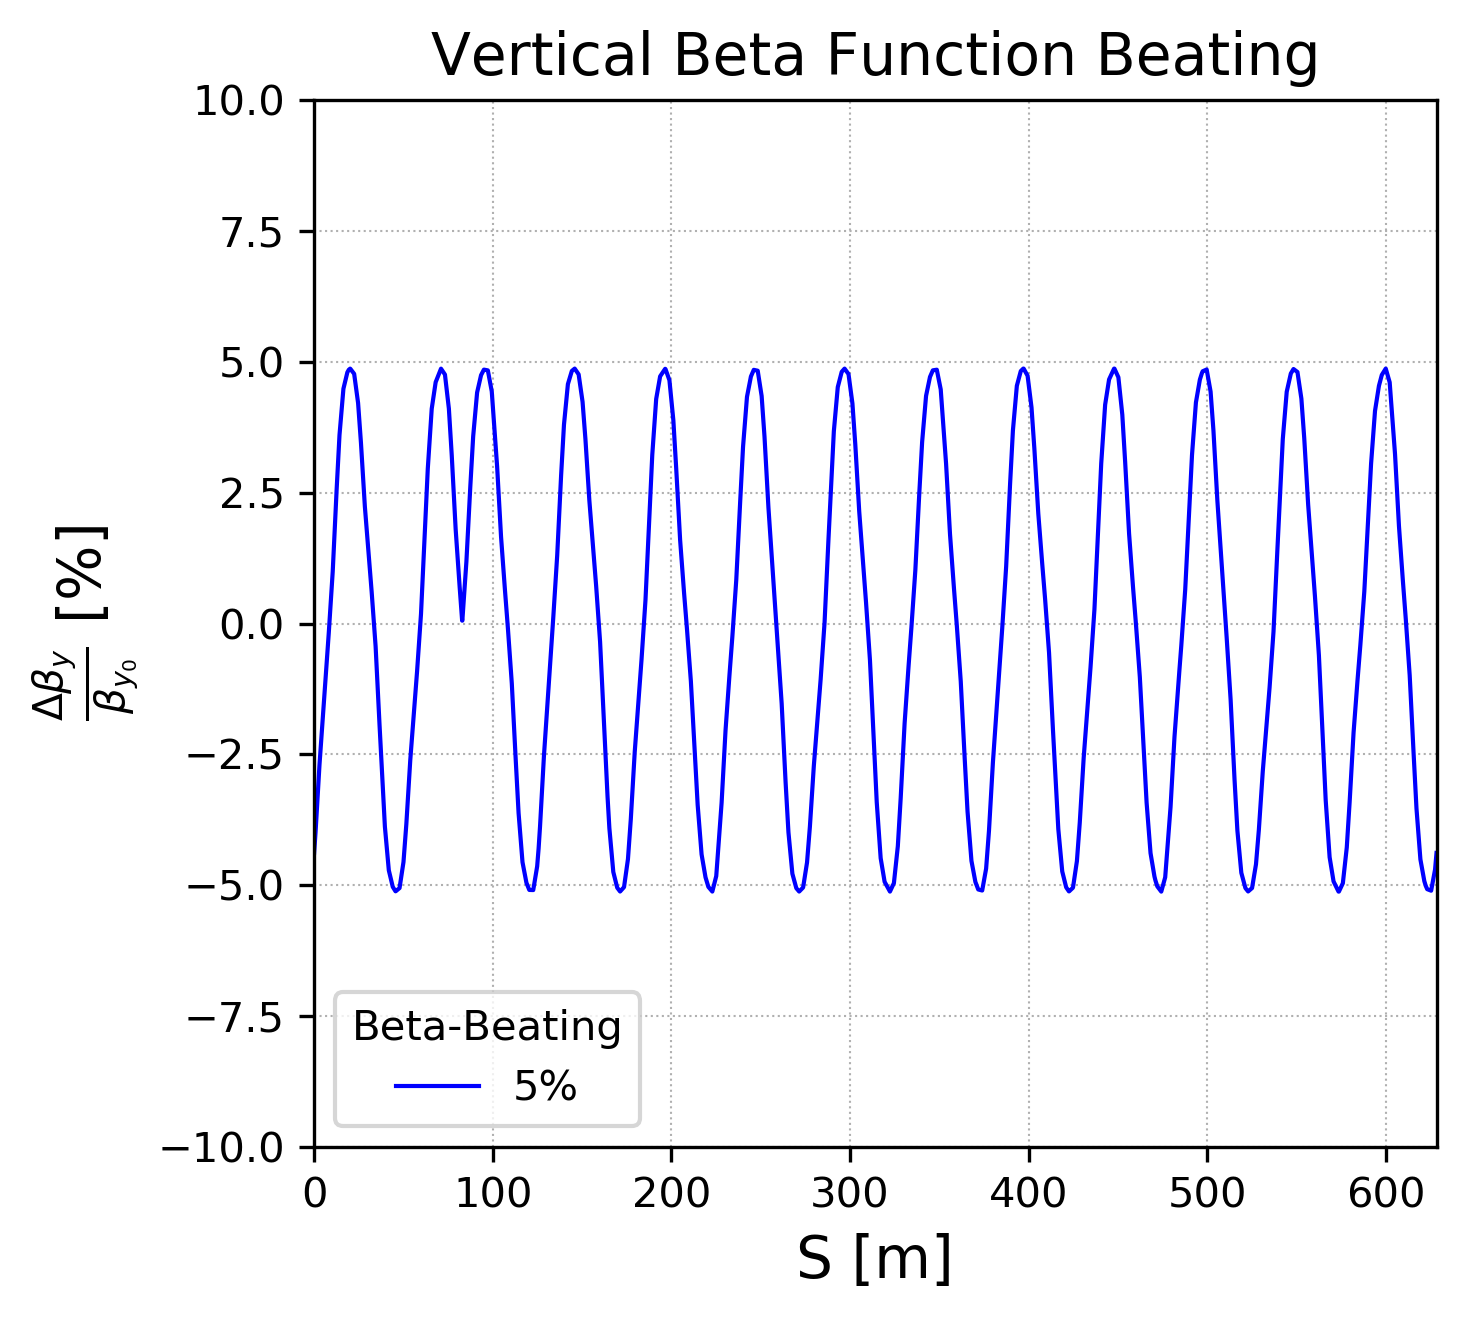

In [62]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

x = np.array(d_00['S'])

y = []
for i in xrange(len(d_00['BETY'])):
    y.append( ((d_00['BETY'][i] - d_05['BETY'][i])/d_00['BETY'][i])*100 )

ax1.plot(x, y, label='5%', color='b');
#ax1.plot(d_05['S'], d_05['BETX'], label='5%', color='r');

ax1.set_title('Vertical Beta Function Beating');

ax1.set_ylabel(r'$\frac{\Delta \beta_y}{\beta_{y_0}}$ [%]');
ax1.set_xlabel('S [m]');

ax1.legend(loc=3, title=legend_label)
ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(0,np.max(d_05['S']))
ax1.set_ylim(-10,10)

fig1.tight_layout()

savename = save_folder + '/'+ main_label + '_beta_y_beating_rel.png'
plt.savefig(savename, dpi = 800);

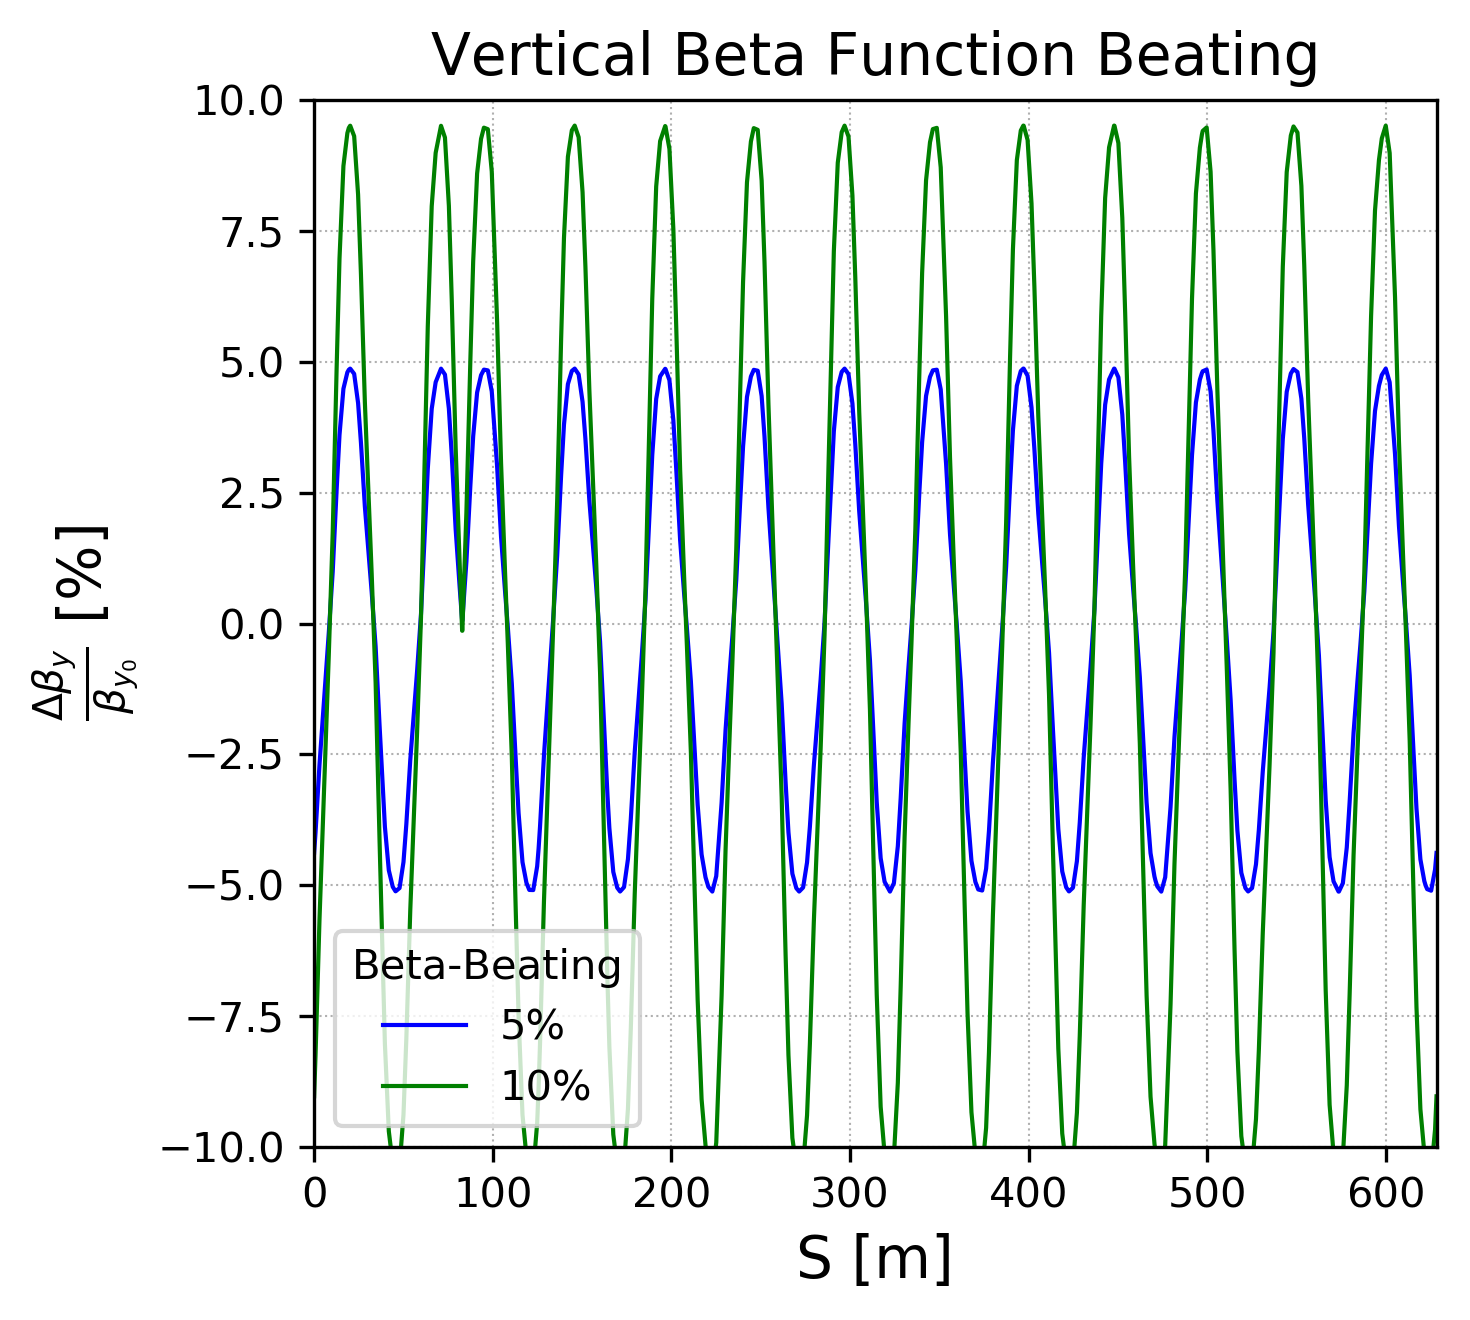

In [63]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

x = np.array(d_00['S'])

y = []
for i in xrange(len(d_00['BETY'])):
    y.append( ((d_00['BETY'][i] - d_05['BETY'][i])/d_00['BETY'][i])*100 )
    
z = []
for i in xrange(len(d_00['BETY'])):
    z.append( ((d_00['BETY'][i] - d_10['BETY'][i])/d_00['BETY'][i])*100 )

ax1.plot(x, y, label='5%', color='b');
ax1.plot(x, z, label='10%', color='g');
#ax1.plot(d_05['S'], d_05['BETX'], label='5%', color='r');

ax1.set_title('Vertical Beta Function Beating');

ax1.set_ylabel(r'$\frac{\Delta \beta_y}{\beta_{y_0}}$ [%]');
ax1.set_xlabel('S [m]');

ax1.legend(loc=3, title=legend_label)
ax1.grid(lw=0.5, ls=':');
ax1.set_xlim(0,np.max(d_05['S']))
ax1.set_ylim(-10,10)

fig1.tight_layout()

savename = save_folder + '/'+ main_label + '_beta_y_beating_rel_all.png'
plt.savefig(savename, dpi = 800);